In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
df = pd.read_excel('https://query.data.world/s/bqrnga7n5nhps5yn5cbiarzdbqv2os')

In [129]:
df.head()

,Party,Name,Type,Address,PAN Given,Amount,Contribution Mode,Financial Year,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CPI,Aziz Pasha,Others,"16-B, Ferozeshah Road New Delhi-1",Y,3000000,CASH,2010-11,NaN,NaN,NaN,NaN,NaN,NaN
1,CPI(M),V K Ramachandran,Others,"No.1, First Floor Main Road Domlur Second Stag...",Y,10000000,"000037, HDFC Bank Bengaluru, Dt. 16.03.2015, 5...",2014-15,NaN,NaN,NaN,NaN,NaN,NaN
2,INC,Dr. Manmohan Singh,Others,"3, Motilal Nehru Place New Delhi",N,108000,"Cheque, State Bank of India Parliament House N...",2014-15,NaN,NaN,NaN,NaN,NaN,NaN
3,INC,Dr. Manda Jagnathan,Others,"9,Firozshah Road New Delhi",N,54000,Through Bank Transfer,2011-12,NaN,NaN,NaN,NaN,NaN,NaN
4,INC,Prof. K.V.Thomas,Others,"17,Dr.B.R.Mehta Lane New Delhi",N,54000,Through Bank Transfer,2011-12,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df.shape #no.of rows and col

(13573, 14)

### Test of Freedom :  Get Creative

#### __Google and find some cool visualizations using matplotlib, you have complete freedom do some cool visualizations as you see fit with the data using this dataset. Remove the Nan Columns (Unnamed 8 to Unnamed 13) and create the magic__

[Matplotlib Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Examples](https://python-graph-gallery.com/matplotlib/)

In [131]:
#removing all columns which contain UNNAMED.
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]
df.head()

,Party,Name,Type,Address,PAN Given,Amount,Contribution Mode,Financial Year
0,CPI,Aziz Pasha,Others,"16-B, Ferozeshah Road New Delhi-1",Y,3000000,CASH,2010-11
1,CPI(M),V K Ramachandran,Others,"No.1, First Floor Main Road Domlur Second Stag...",Y,10000000,"000037, HDFC Bank Bengaluru, Dt. 16.03.2015, 5...",2014-15
2,INC,Dr. Manmohan Singh,Others,"3, Motilal Nehru Place New Delhi",N,108000,"Cheque, State Bank of India Parliament House N...",2014-15
3,INC,Dr. Manda Jagnathan,Others,"9,Firozshah Road New Delhi",N,54000,Through Bank Transfer,2011-12
4,INC,Prof. K.V.Thomas,Others,"17,Dr.B.R.Mehta Lane New Delhi",N,54000,Through Bank Transfer,2011-12


In [132]:
df.shape #6 columns removed

(13573, 8)

In [133]:
df['Party'].unique()

array(['CPI', 'CPI(M)', 'INC', 'BJP', 'NCP'], dtype=object)

In [134]:
df['Contribution Mode'].unique()

array(['CASH',
       '000037, HDFC Bank Bengaluru, Dt. 16.03.2015, 5530, Dt. 16.03.2015',
       'Cheque, State Bank of India Parliament House New Delhi', ...,
       '250507BANK OF BARODA', '901983, Bank of Baroda',
       'Ch No- 170996, Date 31-03-2014, Bank Of Baroda Ahmadabad Branch'],
      dtype=object)

In [135]:
df['Financial Year '].unique()

array(['2010-11', '2014-15', '2011-12', '2013-14', '2004-05', '2012-13',
       '2008-09', '2009-10', '2005-06', '2007-08', '2006-07', '2003-04'],
      dtype=object)

In [136]:
df['Amount'].mean()#average amount 

1045728.3275620717

In [137]:
df['Type'].unique()

array(['Others', 'Electoral Trust'], dtype=object)

In [138]:
df1 = df.groupby(['Party','Financial Year ']).sum()
df1.head()

Amount
Party Financial Year            
BJP   2003-04          116881973
      2004-05          339521289
      2005-06           36156111
      2006-07           29550672
      2007-08          249623653

In [139]:
df1.loc['BJP','Amount']

Financial Year 
2003-04     116881973
2004-05     339521289
2005-06      36156111
2006-07      29550672
2007-08     249623653
2008-09     306057231
2009-10     823220133
2010-11     146253279
2011-12     334194113
2012-13     831924462
2013-14    1708636182
2014-15    4373506898
Name: Amount, dtype: int64

In [140]:
#Let's create a new data frame with financial years as index and party's as columns
df2 = pd.DataFrame()

In [141]:
df2['BJP'] = df1.loc['BJP','Amount']
df2['CPI'] = df1.loc['CPI','Amount']
df2['CPI(M)'] = df1.loc['CPI(M)','Amount']
df2['INC'] = df1.loc['INC','Amount']
df2['NCP'] = df1.loc['NCP','Amount']

In [142]:
df2

,BJP,CPI,CPI(M),INC,NCP
Financial Year,,,,,
2003-04,116881973,779148,200000,28301101,NaN
2004-05,339521289,630000,896355,320555643,NaN
2005-06,36156111,3988690,550000,59212492,NaN
2006-07,29550672,1229400,1124719,121273513,NaN
2007-08,249623653,4125800,7226116,78873451,10225000.0
2008-09,306057231,2585000,4155000,279018460,56091000.0
2009-10,823220133,8667852,3962049,840521238,30300000.0
2010-11,146253279,10811465,15357072,80205884,1355000.0
2011-12,334194113,5982675,23838657,95910664,21000000.0


In [143]:
#Filling the nan values to 0
df2.fillna(value=0,inplace=True)

In [144]:
df2.head()

,BJP,CPI,CPI(M),INC,NCP
Financial Year,,,,,
2003-04,116881973,779148,200000,28301101,0.0
2004-05,339521289,630000,896355,320555643,0.0
2005-06,36156111,3988690,550000,59212492,0.0
2006-07,29550672,1229400,1124719,121273513,0.0
2007-08,249623653,4125800,7226116,78873451,10225000.0


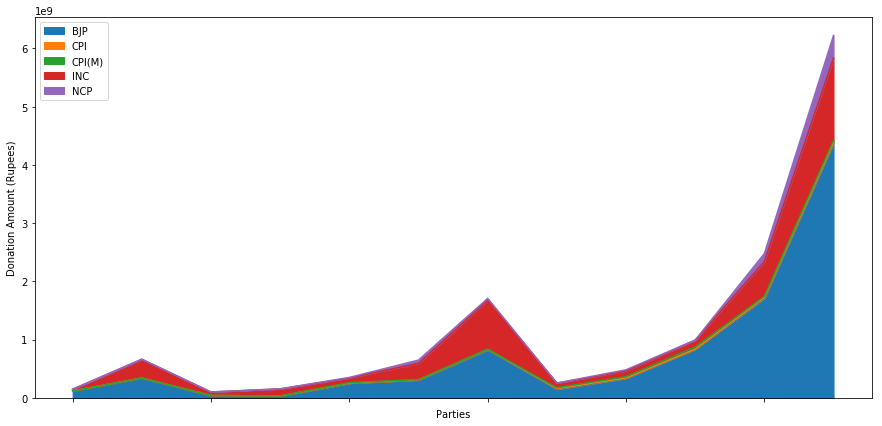

In [145]:
df2.plot(kind='area',figsize=(15,7))
plt.ylabel("Donation Amount (Rupees)")
plt.xlabel("Parties")
plt.show() 

In [146]:
df3 = df.groupby(['Type','Financial Year ']).sum()
df3

Amount
Type            Financial Year             
Electoral Trust 2003-04             5000000
                2004-05           209257237
                2005-06             3500000
                2006-07           100000000
                2007-08            57600000
                2008-09           190030000
                2009-10           484375414
                2011-12            15000000
                2012-13            75000000
                2013-14           818720000
                2014-15          2670875751
Others          2003-04           141162222
                2004-05           452346050
                2005-06            96407293
                2006-07            53178304
                2007-08           292474020
                2008-09           457876691
                2009-10          1222295858
                2010-11           253982700
                2011-12           465926109
                2012-13           916430132
                2013-14          1659210120
                2014-15          3553022689

In [147]:
#Let's create a new data frame with financial years as index and type as columns
df4 = pd.DataFrame()

In [148]:
df3.loc['Others','Amount']

Financial Year 
2003-04     141162222
2004-05     452346050
2005-06      96407293
2006-07      53178304
2007-08     292474020
2008-09     457876691
2009-10    1222295858
2010-11     253982700
2011-12     465926109
2012-13     916430132
2013-14    1659210120
2014-15    3553022689
Name: Amount, dtype: int64

In [149]:
df4['Others'] = df3.loc['Others','Amount']
df4['Electoral Trust'] = df3.loc['Electoral Trust','Amount']

In [150]:
df4

,Others,Electoral Trust
Financial Year,,
2003-04,141162222,5.000000e+06
2004-05,452346050,2.092572e+08
2005-06,96407293,3.500000e+06
2006-07,53178304,1.000000e+08
2007-08,292474020,5.760000e+07
2008-09,457876691,1.900300e+08
2009-10,1222295858,4.843754e+08
2010-11,253982700,NaN
2011-12,465926109,1.500000e+07


In [151]:
#Filling the nan values to 0
df4.fillna(value=0,inplace=True)

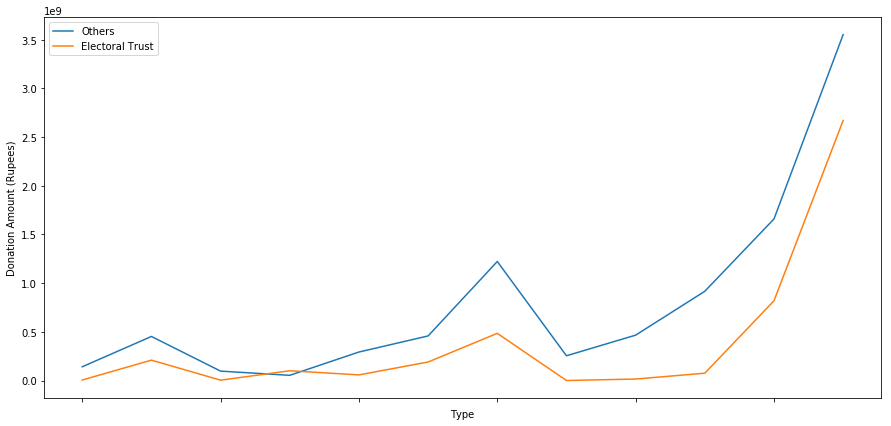

In [152]:
df4.plot(kind='line',figsize=(15,7))
plt.ylabel("Donation Amount (Rupees)")
plt.xlabel("Type")
plt.show() 

In [153]:
df5 = df.groupby(['PAN Given','Party']).sum()
df5

Amount
PAN Given Party             
N         BJP     4159772091
          CPI       33840427
          CPI(M)    34794301
          INC     2844049865
          NCP       92351000
Y         BJP     5135753905
          CPI       34283271
          CPI(M)   115827827
          INC     1187437484
          NCP      555560419

In [154]:
df6 = df.groupby(['Party','PAN Given']).sum()
df6

Amount
Party  PAN Given            
BJP    N          4159772091
       Y          5135753905
CPI    N            33840427
       Y            34283271
CPI(M) N            34794301
       Y           115827827
INC    N          2844049865
       Y          1187437484
NCP    N            92351000
       Y           555560419

In [172]:
#Let's create a new data frame
dfy = pd.DataFrame()

In [173]:
dfy=df.groupby(['Financial Year ']).sum()
#Filling the nan values to 0
dfy.fillna(value=0,inplace=True)

In [174]:
dfy

,Amount
Financial Year,
2003-04,146162222
2004-05,661603287
2005-06,99907293
2006-07,153178304
2007-08,350074020
2008-09,647906691
2009-10,1706671272
2010-11,253982700
2011-12,480926109


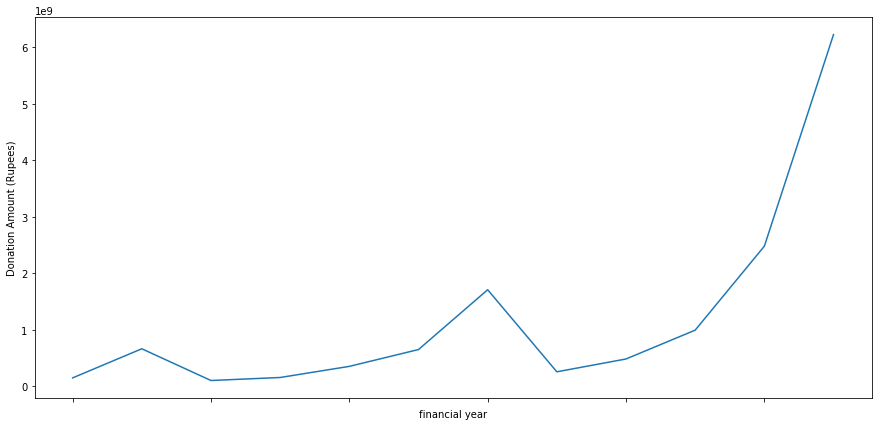

In [180]:
dfy['Amount'].plot(kind='line',figsize=(15,7))
plt.ylabel("Donation Amount (Rupees)")
plt.xlabel("financial year")
plt.show() 